**COMP3670 Assignment 3 - Model Meets Data + Clustering**
---

**Enter Your Student ID:** u6726234

**Your Name:** Wyman Wong
    
**Deadline:** 23:59pm, August 25th, 2019

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'.

**Enter Discussion Partner IDs Below:**
- None

You could add more IDs with the same markdown format above.

**Theory Section** (50%)
- A = 10%
- B = 8%
- C = 8%
- D = 9%
- E = 6%
- F = 9%


**Programming Section** (50%)
- 1.1 = 2.5%
- 1.2 = 5%
- 2.1 = 7%
- 2.2 = 7%
- 2.3 = 7%
- 2.4 = 1.5%
- 3.1 = 15%
- 3.2 = 5%

THEORY SECTION (50%)
---

You can 1) write your answers in Jupyter notebook mark down (encouraged), 2) embed images of your answers for each respective answer after the headings below, or 3) upload a pdf of your solution (photo of the solution) as a second file.

**THEORY EXERCISE A**

Given a data set $D = \{\textbf{x}_1, \ldots \textbf{x}_N \}$,
we would like to classify the data set into $K$ many clusters,
grouping the points into the clusters based on similarity. 
One algorithm to do this is the K-means algorithm.

For each point $\textbf{x}_n$, we introduce the binary indicator 
$r_{nk} \in \{0,1\}$, which indicates to which cluster $\textbf{x}_n$ belongs.

$$
r_{nk} = \begin{cases}
1 & \textbf{x}_n \text{ is assigned to cluster }k \\
0 & \text{otherwise} \end{cases}	
$$

We introduce a collection of vectors $\{ \boldsymbol{\mu}_1, \ldots \boldsymbol{\mu}_K \}$,
where $\boldsymbol{\mu}_k$ is a vector that represents cluster $k$.

The loss function (which measures the squared distance of 
how far each data point $\boldsymbol{x}_n$ is away from the 
representative vector $\boldsymbol{\mu}_k$ of its cluster) is given by

$$
L = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\textbf{x}_n - \boldsymbol{\mu}_k||_2^2
$$

We define the K-means algorithm as follows:

<ol>
    <li>
        $\textbf{Initalise:}$ Choose initial values for 
        the vectors $\{ \boldsymbol{\mu}_1, \ldots \boldsymbol{\mu}_K \}$.
    </li>
    <li>
        $\textbf{Expectation:}$ Update the cluster assignments such that each data point
        $\textbf{x}_n$ is assigned to the cluster with closest representative $\boldsymbol{\mu}_k$.
        $$
        r_{nk} := \begin{cases}
        1 & k = \text{argmin}_j ||\textbf{x}_n - \boldsymbol{\mu}_j||_2^2 \\
        0 & \text{otherwise}
        \end{cases}
        $$
    </li>
    <li>
        $\textbf{Maximisation:}$ Update the representatives $\boldsymbol{\mu}_k$ to be the average
        of all data points currently assigned to cluster $k$
        $$
        \boldsymbol{\mu}_k := \frac{\sum_{n} r_{nk} \textbf{x}_n}{\sum_n r_{nk}}  
        = \frac{\text{sum of all data points assigned to $k$}}
        {\text{number of data points assigned to $k$}}
        $$
    </li>
    <li>
        Repeat steps 2 and 3 until there are no further changes in the assignments of
        $r_{nk}$ or $\boldsymbol{\mu}_k$.
    </li>
</ol>


Assuming finitely many data points and clusters ($K, N < \infty$), argue why the 
K-means algorithm must terminate after finitely many steps. 

You may assume that during the maximisation step, for a given set of assignments $r_{nk}$,
choosing $\boldsymbol{\mu}_k:= \frac{\sum_{n} r_{nk} \textbf{x}_n}{\sum_n r_{nk}}$ minimises the
loss function with respect to $\boldsymbol{\mu}_k$. (Deriving this property requires vector calculus
not yet covered.)

*Write your answer here*

**THEORY EXERCISE B**

Let $V$ be a vector space, and let $|| \cdot ||_a$ and
$|| \cdot ||_b$ both be norms on $V$.
Let $\alpha > 0$ and  $\beta > 0$, and define
$$
||\textbf{x}||_c := \alpha ||\textbf{x}||_a + \beta || \textbf{x} ||_b 
$$
Prove that $||\cdot||_c$ is also a norm.

*Write your answer here*

**(1) Absolutely homegeneous**

$ For \quad \forall \lambda \in R, $

$$
\begin{align}
    ||\lambda x||_c &= \alpha||\lambda x||_a + \beta||\lambda x||_b \\
                  &= \alpha|\lambda|||x||_a + \beta|\lambda|||x||_b & (||\cdot||_a \quad and \quad ||\cdot||_b \quad are  \quad norms) \\
                  &= |\lambda|(\alpha||x||_a + \beta||x||_b) \\
                  &= |\lambda|||x||_c
\end{align}
$$

**(2)Triangle inequality**

$ \text{For } \forall x,y \subseteq V, $

$$
\begin{align}
    ||x+y||_c &= \alpha||x+y||_a + \beta||x+y||_b \\
              &\leqslant \alpha(||x||_a+||y||_a) + \beta(||x||_b+||y||_b) & (||\cdot||_a \quad and \quad ||\cdot||_b \quad are \quad norms) \\
              &= (\alpha||x||_a+\beta||x||_b) + (\alpha||y||_a + +\beta||y||_b) \\
              &= ||x||_c + ||y||_b
\end{align}
$$

**(3)Positive definite**

$ \text{For } \forall x \subset V \text{ , since } ||x||_a > 0, ||x||_b > 0, \alpha > 0, \beta > 0 $

$$
\begin{align}
    ||x||_c &= \alpha||\lambda x||_a + \beta||\lambda x||_b \geqslant 0 
\end{align}
$$
$\text{only when } x = 0, \text{ we have }||x||_c = 0$

From the proof above, $||\cdot||$ is also a norm.

**THEORY EXERCISE C**

Given a norm $||\cdot||$, prove that 
$d(\textbf{x},\textbf{y}) := ||\textbf{x}-\textbf{y}||$ is a metric.

*Write your answer here*

**(1)Positive definite**

$ \text{For } \forall x, y \subseteq V,$

$$
\begin{align}
    ||x - y|| \text{ is a norm } \Rightarrow d(x, y) = ||x - y|| \geqslant 0 
    \quad \text{ only when } x = y, \text{ we have } d(x, y) = 0
\end{align}
$$


**(2)Symmetric**

$ \text{For } \forall x, y \subseteq V,$

$$
\begin{align}
    d(y, x) &= ||y-x||  \\
            &= \sqrt{<y-x, y-x>} \\
            &= \sqrt{<-(x-y), -(x-y)>} \\
            &= \sqrt{<x-y, x-y>}  &  \text{(Bilinearility of general inner product)} \\
            &= ||x-y|| \\
            &= d(x, y)  
\end{align}
$$

**(3)Triangle inequality**

$ \text{For } \forall x,y,z \subseteq V, $

$$
\begin{align}
    d(x, z) &= ||x-z|| \\
            &= ||(x-y)+(y-z)|| \\
            &\leqslant ||x-y|| + ||y-z|| \\ 
            &= d(x, y) + d(y, z)
\end{align}
$$

From the proof above, $d(x, y) = ||x-y|| $ is a metric.


**THEORY EXERCISE D**

Let $(V, \langle \cdot, \cdot \rangle)$ be an inner product space.
Let $||\textbf{x}|| := \sqrt{\langle \textbf{x},\textbf{x} \rangle}$. Prove that $||\cdot||$ is a norm.

(Hint: To prove the triangle inequality holds, you may need the Cauchy-Schwartz inequality, 
$\langle \textbf{x},\textbf{y} \rangle \leq ||\textbf{x}|| \: ||\textbf{y}||$.)

*Write your answer here*

**(1) Absolutely homegeneous**

$ For \quad \forall \lambda \in R, $

$$
\begin{align}
    ||\lambda x|| &= \sqrt{<\lambda x, \lambda x>} \\
                  &= \sqrt{\lambda^2<x, x>}  & \text{(Bilinearility of general inner product)} \\
                  &= |\lambda|\sqrt{<x, x>} \\
                  &= |\lambda|||x||
\end{align}
$$


**(2)Positive definite**

$ \text{For } \forall x \subset V, $

$$
\begin{align}
    ||x|| &= \sqrt{<x, x>} \geqslant 0 & \text{(Positive definite of general inner product)} \\
\end{align}
$$
$\text{only when } x = 0, \text{ we have }||x|| = 0$

**(3)Triangle inequality**

$ \text{For } \forall x,y \subseteq V, $

$$
\begin{align}
    ||x+y|| &= \sqrt{<x+y, x+y>} \\
            &= \sqrt{<x,x> + <x,y> + <y,x> + <y,y>} & \text{(Bilinearility of general inner product)} \\
            &= \sqrt{<x,x> + 2<x,y> + <y,y>} & \text{(Symmetric of general inner product)} \\
            &\leqslant \sqrt{||x||^2 + 2||x||||y|| + ||y||^2} & \text{(Cauchy-Schwartz inequality)} \\
            &= \sqrt{(||x||+||y||)^2} \\
            &= ||x|| + ||y|| & \text{(Positive definite in (2))}
\end{align}
$$

From the proof above, $||x|| := \sqrt{<x, x>}$ is also a norm.

**THEORY EXERCISE E**

Consider the vector space $\mathbb{R}^2$, equipped with the standard dot product 
and the standard Eucledian norm
$$
||\mathbf{x}||_2 := \sqrt{\textbf{x} \cdot \textbf{x}},
\quad 
\textbf{x} \cdot \textbf{y} := \textbf{x}^T \textbf{y}
$$
Let
$$
\textbf{R}_\theta := 
\begin{bmatrix}
\cos \theta & - \sin \theta \\
\sin \theta & \cos \theta 
\end{bmatrix}
$$
be the standard rotation matrix on vectors in $\mathbb{R}^2$.

Let $\angle(\textbf{x},\textbf{y})$ denote the angle between $\textbf{x}$ and 
$\textbf{y}$, defined by the equation
$$
\cos \angle(\textbf{x},\textbf{y}) 
:= \frac{\textbf{x} \cdot \textbf{y}}{||\textbf{x}||_2 ||\textbf{y}||_2}.
$$
Prove that
$$
\angle(\textbf{R}_\theta \textbf{x}, \textbf{R}_\theta \textbf{y}) 
= \angle(\textbf{x},\textbf{y})
$$
for any rotation $\theta \in \mathbb{R}$.

*Write your answer here*

$$
\begin{align}
    \cos\angle(\textbf{R}_\theta x, \textbf{R}_\theta y) &= \frac{\textbf{R}_\theta x \cdot \textbf{R}_\theta y}{||\textbf{R}_\theta x||_2 ||\textbf{R}_\theta y||_2} \\
    &= \frac{(\textbf{R}_\theta x)^T\textbf{R}_\theta y}{\sqrt{(\textbf{R}_\theta x)^T\textbf{R}_\theta x (\textbf{R}_\theta y)^T\textbf{R}_\theta y}} \\
    &= \frac{x^T\textbf{R}_\theta^T\textbf{R}_\theta y}{\sqrt{x^T\textbf{R}_\theta^T\textbf{R}_\theta x y^T\textbf{R}_\theta^T\textbf{R}_\theta y}} \\
    &= \frac{x^TI_2y}{\sqrt{x^TI_2x y^TI_2y}} & \textbf{(R}_\theta^T\textbf{R}_\theta = I_2\textbf{)} \\
    &= \frac{x^Ty}{\sqrt{x^Tx y^Ty}} \\
    &= \cos\angle(x, y)
\end{align}
$$

So
$$
\angle(\textbf{R}_\theta \textbf{x}, \textbf{R}_\theta \textbf{y}) 
= \angle(\textbf{x},\textbf{y})
$$
holds for any rotation $\theta \in \mathbb{R}$.

**THEORY EXERCISE F**

Let $V$ be a vector space, and let $d : V \times V \to \mathbb{R}$ be a metric.
Define
$$
d_2(\textbf{x},\textbf{y}) = \log( d(\textbf{x},\textbf{y}) + 1).
$$
Is $d_2$ a metric on $V$?

*Write your answer here*

**(1)Positive definite**

$ \text{For } \forall x, y \subseteq V,$

$$
\begin{align}
    d(x,y) \text{ is a metrix } &\Rightarrow d(x,y) \geqslant 0 \\
    &\Rightarrow d(x,y)+1 \geqslant 1 \\
    &\Rightarrow log(d(x,y)+1) \geqslant 0 & \text{(Definition of log)}\\
    &\Rightarrow d_2(x,y) \geqslant 0 
\end{align}
$$

$ \text{ only when } x = y, \text{ we have } d_2(x, y) = 0 $


**(2)Symmetric**

$ \text{For } \forall x, y \subseteq V,$

$$
\begin{align}
    d_2(y, x) &= log(d(y,x)+1) \\
              &= log(d(x,y)+1) & \text{(d(x,y) is symmtric)} \\
              &= d_2(x, y)  
\end{align}
$$

**(3)Triangle inequality**

$ \text{For } \forall x,y,z \subseteq V, $

$$
\begin{align}
    d_2(x, y) + d_2(y, z) &= log(d(x, y) + 1）+ log(d(y, z) + 1） \\
            &= log[(d(x, y) + 1)(d(y, z) + 1)] \\
            &= log[d(x, y)d(y, z) + d(x, y) + d(y, z) + 1] \\ 
            &\geqslant log[d(x, y)d(y, z) + d(x, z) + 1] & \text{(Triangle inequality of d)} \\
            &\geqslant log[d(x, z) + 1] & \text{(Positive definite of d)} \\
            &= d_2(x, z)
\end{align}
$$

From the proof above, $d_2(x, y) = log(d(x, y) + 1) $ is a metric.


**PROGRAMMING SECTION (50%)**
---

For all of the following, program the solution yourself. Don't just call a library function that does the whole question for you, or you'll get zero (no, that doesn't mean you can't use any library functions, but it does mean that you have to show you understand how to compute the answer yourself).

-----------

   **TASK 0.1:** You know the drill. Import Numpy and PyPlot.


-----------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #This is for 3d scatter plots.
import math
np.random.seed(1)

print('Done')

Done


PROGRAMMING EXERCISE 1  
-----------

These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

This assignment requires you to loosely interpret how k-means is a specific case of a more general algorithm named Expectation Maximisation. This is explained toward the end of the above article.

First, lets create a dataset.

---
   **TASK 1.1:** Use np.random.multivariate_normal() to create a dataset of 400 2-dimensional samples. 
   
   This should be a 400x2 matrix.
   
   Use the matrix $\frac{1}{30} \times \begin{bmatrix}
1&0 \\
0 &1
\end{bmatrix}
$ as the covariance matrix.
   
   100 of them should have a mean of $\begin{bmatrix}
0.5&0.5
\end{bmatrix}
$
   
100 of them should have a mean of $\begin{bmatrix}
-0.5&0.5
\end{bmatrix}
$

100 of them should have a mean of $\begin{bmatrix}
0.75&-0.5
\end{bmatrix}
$

100 of them should have a mean of $\begin{bmatrix}
-0.25&-0.5
\end{bmatrix}
$

---

**HINT:**
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html
- Use np.random.multivariate_normal() 4 times to generate these 4 data subsets.

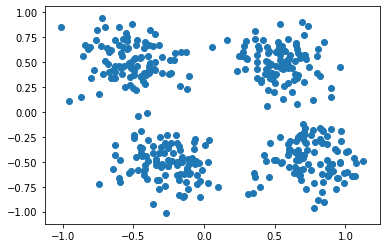

In [2]:
def generate_data():
    X = np.zeros((400, 2))
    #YOUR CODE HERE.
    mean1 = np.array([0.5, 0.5])
    mean2 = np.array([-0.5, 0.5])
    mean3 = np.array([0.75, -0.5])
    mean4 = np.array([-0.25, -0.5])
    cov = np.array([[1.0, 0.0], [0.0, 1.0]]) / 30
    size = 100
    
    X[: size, :] = np.random.multivariate_normal(mean1, cov, size)
    X[size: size*2, :] = np.random.multivariate_normal(mean2, cov, size)
    X[size*2: size*3, :] = np.random.multivariate_normal(mean3, cov, size)
    X[size*3: size*4, :] = np.random.multivariate_normal(mean4, cov, size)
    return X

X = generate_data()
plt.scatter(X[:,0], X[:,1])
plt.show()

K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

If each of your samples, such as the 400 you generated in the previous question, are of dimension $n$, then each of your centroids will be of dimension $n$.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

---

**TASK 1.2:** Write a function $initialise\_parameters(m, n, X) = C$ which generates $m$ centroids, each of dimension $n$, and stores them in a matrix $C \in \mathbb{R}^{m \times n}$.

No two centroids should be the same, and **must not** be hard coded. Generate these parameters using a sensible initialisation method such as those described in the first link below. You will be judged based on whether the method you choose is sensible and likely to result in kmeans converging to good result.

---

**HINT:** 
- https://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

In [24]:
def initialise_parameters(m, n, X):
    C = np.zeros((m, n))
    #YOUR CODE HERE.
    
    # Standart algorithm.
    for i in range(m):
        C[i,:] = X[np.random.randint(0, X.shape[0]), :]
    
    
    
    ''' k-means++
    1. Choose one center uniformly at random from among the data points.
    2. For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen.
    3. Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.
    4. Repeat Steps 2 and 3 until k centers have been chosen.
    5. Now that the initial centers have been chosen, proceed using standard k-means clustering.
    '''
    return C

C = initialise_parameters(4, 2, X)
print(C)

[[ 0.783053   -0.29785834]
 [ 0.57366716  0.60837212]
 [-0.1175332  -0.55919132]
 [-0.76045219  0.82278385]]


PROGRAMMING EXERCISE 2
-----------

Now we implement k-means.

---
   **TASK 2.1:** Create a function $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** (or "assignment step") mentioned earlier.

---

**HINT:** 
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
- https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm
- Each row of $L$ is a centroid taken from $C$.

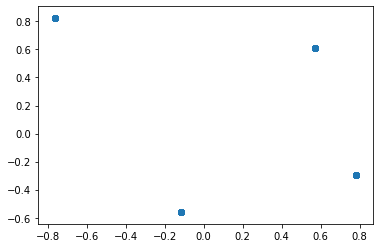

In [66]:
def E_step(C, X):
    L = np.zeros(X.shape)
    #YOUR CODE HERE.
    d = np.zeros((C.shape[0]))
    for i in range(L.shape[0]):    # Iterate every data point.
        for j in range(C.shape[0]):    # Iterate every initial centroid.
            d[j] = np.linalg.norm(C[j, :] - X[i, :])
        L[i,:] = C[np.argmin(d), :]
    return L

L = E_step(C, X)
plt.scatter(L[:, 0], L[:, 1])
plt.show()

---

**TASK 2.2:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [69]:
def M_step(C, X, L):
    new_C = np.zeros(C.shape)
    #YOUR CODE HERE.
    mark = np.zeros(L.shape[0], dtype="bool")
    
    for i in range(C.shape[0]):
        for j in range(L.shape[0]):
            mark[j] = np.array_equal(C[i,], L[j,]) # marked with 0 and 1.
            
        new_C[i] = mark@X / np.sum(mark)
        
    return new_C

print('Before:')
print(C)
print('\nAfter:')
print(M_step(C, X, L))

Before:
[[ 0.783053   -0.29785834]
 [ 0.57366716  0.60837212]
 [-0.1175332  -0.55919132]
 [-0.76045219  0.82278385]]

After:
[[ 0.76995466 -0.44053662]
 [ 0.5228744   0.51085399]
 [-0.23821609 -0.51434102]
 [-0.52919681  0.52046946]]


---
**TASK 2.3:** Implement $kmeans(X, m, i) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$, and uses the previous 3 functions you wrote to:
- generate $m$ centroids.
- iterate between the E and M steps $i$ times (ie, it iterates $i$ times) to classify the $m$ clusters.

...and then returns:
- $C$, the centers of the $m$ clusters after $i$ iterations.
- $L$, the labels (centroid values) assigned to each sample in the dataset after $i$ iterations.
---

Initial Parameters:
[[ 0.783053   -0.29785834]
 [ 0.57366716  0.60837212]
 [-0.1175332  -0.55919132]
 [-0.76045219  0.82278385]]

Final Parameters:
[[-0.26889587 -0.51099578]
 [ 0.75218744 -0.47678005]
 [ 0.53571121  0.49638106]
 [-0.52076962  0.5158475 ]]


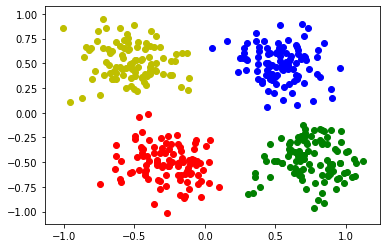

In [71]:
def kmeans(X, m, i):
    L = np.zeros(X.shape)
    C = None

    #YOUR CODE HERE.
    C = initialise_parameters(m, X.shape[1], X)
    for idx in range(i):
        L = E_step(C, X)
        C = M_step(C, X, L)

    return C, L

#CODE TO DISPLAY YOUR RESULTS. DO NOT MODIFY.
C_final, L_final = kmeans(X, 4, 10)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)

def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y']
for i in range(4):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,0], cluster[:,1], c=colours[i])
plt.show()

---
**TASK 2.4:** Write a function $kmeans\_classify(C, x) = c$, that takes a row vector $x$, a matrix of centroids $C$, and returns $c$, the centroid that is closest to $x$.

---

[-0.26889587 -0.51099578]


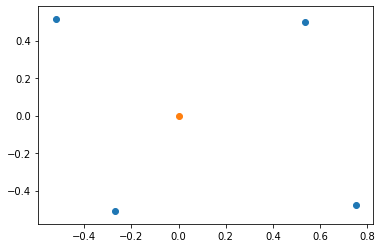

In [97]:
#YOUR CODE HERE.
def kmeans_classify(C, x):
    d = np.zeros(C.shape[0])
    d[:] = np.linalg.norm(C[:,]-x, axis=1)
    c = C[np.argmin(d)]
    
    return c
    
# Self testing code
x = np.array([0, 0])
print(kmeans_classify(C_final, x))

# Display the result of all centroids and the row vector provided.
plt.scatter(C_final[:,0], C_final[:,1])
plt.scatter(x[0], x[1])
plt.show()

PROGRAMMING EXERCISE 3
---


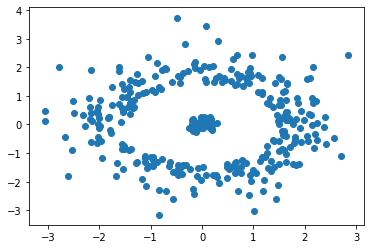

In [95]:
def gen_z():
    Z = np.random.randn(800, 2)
    for r in range(Z.shape[0]):
        s = np.linalg.norm(Z[r, :])
        Z[r, :] = Z[r, :] * (s < 0.3 or s > 1.45)
    return Z
Z = gen_z()
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

Above is a new dataset $Z$.

As you can see from the scatter plot, $Z$ is composed of 2 clusters; an inner clump, and an outer ring.

K-means will not be able to cluster this dataset effectively as the clusters are not linearly separable (meaning one cannot draw a straight line that separates the two clusters).

---
**TASK 3.1:** Add a 3rd dimension to the data in $Z$ such that the two clusters become linearly separable, then apply kmeans to separate the two clusters.

Having done so, use your two centroids to colour the two sets of samples in the 3D plot below by modifying the code below such that the inner cluster is red, and the outer cluster blue.

---

**HINT:** 
- Use the first 2 dimensions of each sample in $Z$ to compute a 3rd dimension for that sample. This means $Z \in \mathbb{R}^{800 \times 2}$ will become $Z \in \mathbb{R}^{800 \times 3}$.
- Observe how the data in Z are created in the code cell above. What 3rd dimension might help you draw a plane in 3 dimensional space between these two clusters?
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html
- You might want to use the $allocator(C, L, x)$ function above.
- Remember, your initialisation method is key to ensuring convergence.
- Use "Kernel -> Restart and Run All" if you're stuck.

In [104]:
base = 4
d = np.array([1,2,0.1,0.2,-0.2,-1])

z = (2*(d < 0.3)-1) * base
print(z)

[-4 -4  4  4  4  4]


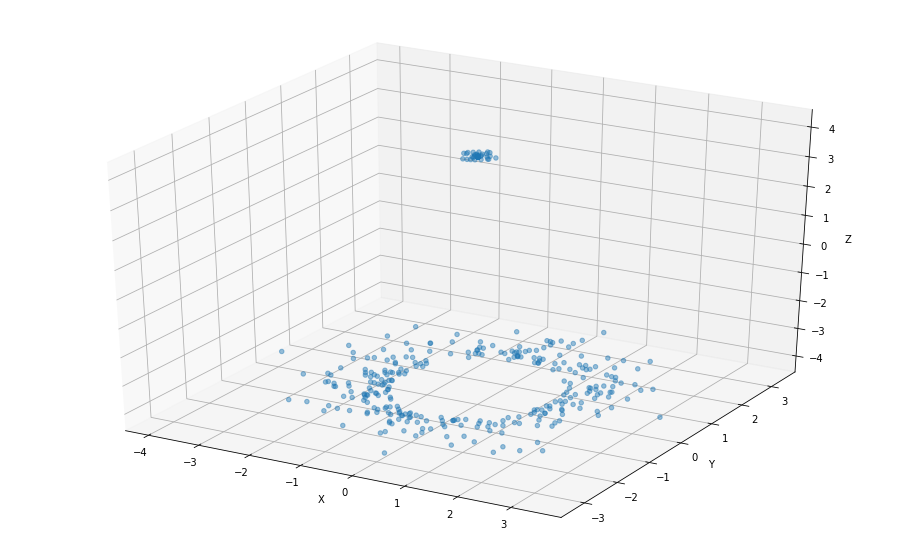

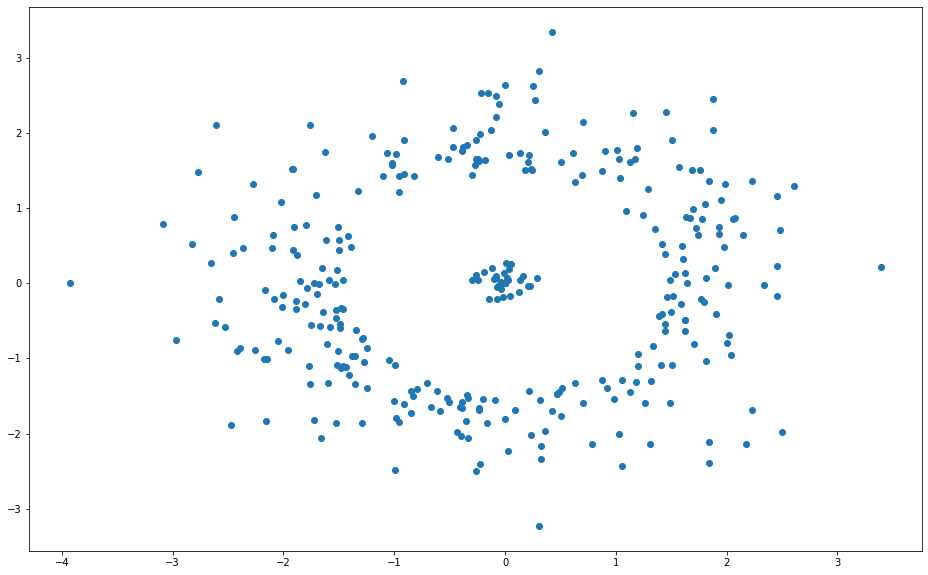

In [110]:
Z = gen_z()
#YOUR CODE HERE.
base = 4
scale_z = np.zeros((Z.shape[0], 1))
for i in range(Z.shape[0]):
    d = np.linalg.norm(Z[i, :])
    scale_z[i] = (2*(d < 0.3)-1) * base
Z = np.hstack((Z, scale_z))

#DISPLAY CODE. MODIFY THIS AS YOU SEE FIT.
colours = ['r', 'b']
if Z.shape[1] == 2:
    Z = np.hstack((Z, np.zeros((800, 1))))
cluster = Z
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], alpha=0.45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

fig = plt.figure(figsize=(16, 10))
plt.scatter(cluster[:,0], cluster[:,1])
plt.show()

---
**TASK 3.2:** In your own (between 50 and 500) words, explain how K-means works, the reasons you chose the initialisation method you did in 1.2, the difference between supervised and unsupervised learning, and why K-means is considered a means of unsupervised learning.

You will be judged on whether you display understanding of and insight into this material.

---

**HINT:** https://en.wikipedia.org/wiki/Unsupervised_learning

*Write your answer here.*

---